### This notebook compares the results of using Gallagher algorithm to using scipy.optimize to minimize the objective value. The point here is that the global optimum found by scipy.optimize is indeed just the solution found by Gallagher. We also demonstrate that the integer valued best solution (found by brute force searching over all integer routing tables), returns a worse objective value

In [7]:
%load_ext autoreload
%autoreload 2

from graphs import *
from gallagher_algorithm import *
from integer_and_scipy import *
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Linear Relationship between Traffic and Delay on any Link

First we specify an Eta (a stepsize in the algorithm)

In [8]:
eta = 0.1

Next we generate a Network, either by calling the Constructor or by using a saved network pkl

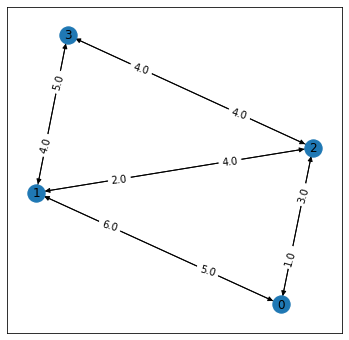

In [9]:
# From Params
#seed = 11
#n = 4
#np.random.seed(seed)
#D = np.random.randint(1, 7, size=(n,n))
#G = Network(n=n, seed=seed, D=D, p=0.7)
#G.setPhi(shortestPathsPhi(G))
#G.toPickle('4_node.pkl')

# From Pickle
G = netFromPickle('4_node.pkl')

G.visualize(withEdgeTraffic=True);
plt.gcf().set_size_inches(6, 6)

Next we run Gallagher's algorithm till it converges. We also visualize what the edge weights look like after Gallagher.

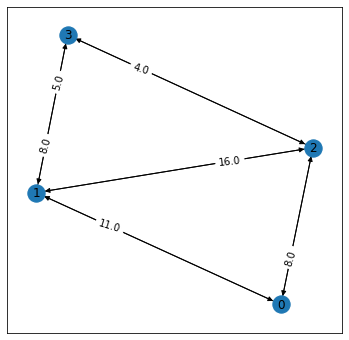

In [10]:
scores = iterGallagher(G, nTrials=100, eta=eta)
assert(convergenceConditions(G))
gallagher_best = G.D_T()
G.visualize(withEdgeTraffic=True);
plt.gcf().set_size_inches(6, 6)

We will next run scipy.optimize to get the optimal routing tables and optimal score. We will visualize what the edge weights look like with these optimal phi as well.

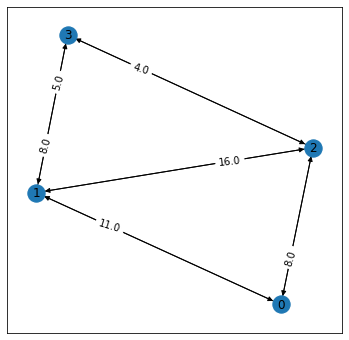

In [11]:
res, phi_best = optim(G) # Run the optimization routine
scipy_best = res.fun
G.setPhi(phi_best)
G.visualize(withEdgeTraffic=True);
plt.gcf().set_size_inches(6, 6)

We next take the same original network and use the integerRouting routine to find the best integer scores, dumping these to a pickle. This step is very slow, so we'll comment it out after we have our pickle.

In [12]:
#G = netFromPickle('4_node.pkl')
#phi_best = integerRoutingPhi(G)
#with open('p_best.pkl', 'wb') as f:
#    pickle.dump(phi_best, f)

We then take our network, set the routing tables to the integer best, and compute the objective value.

In [13]:
G2 = netFromPickle('4_node.pkl')
with open('p_best.pkl', 'rb') as f:
    G2.setPhi(pickle.load(f))
    
integer_best = G2.D_T()

Finally, we plot the Gallagher scores at each iteration, with a horizontal line for the scipy score, and a horizontal line for the best integer score.

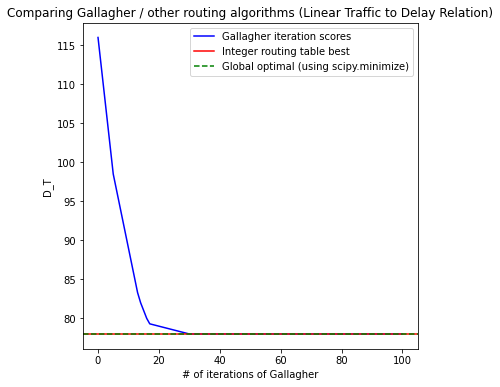

In [14]:
plt.plot(scores, 'b-', label='Gallagher iteration scores')
plt.axhline(y=integer_best, color='r', ls='-', label='Integer routing table best')
plt.axhline(y=scipy_best, color='g', ls='--', label='Global optimal (using scipy.minimize)')
plt.xlabel('# of iterations of Gallagher'); plt.ylabel('D_T');
plt.title('Comparing Gallagher / other routing algorithms (Linear Traffic to Delay Relation)')
plt.gcf().set_size_inches(6, 6)
plt.legend();

In [15]:
print('Gallagher score: ', gallagher_best)
print('Scipy score: ', scipy_best)
print('Integer score: ', integer_best)

Gallagher score:  78.0
Scipy score:  78.0
Integer score:  78.0


## The point here is that Gallagher, the integer brute force, and scipy.optimize, all agree on the optimal routing tables to use

# Quadratic Relationship between Traffic and Delay on any Link

First we specify an Eta (a stepsize in the algorithm)

In [16]:
eta = 0.01

Next we generate a Network by calling the Constructor. Here, however,
we specify custom D_func, and derivD_func, arguments to get a quadratic relationship between traffic and delay

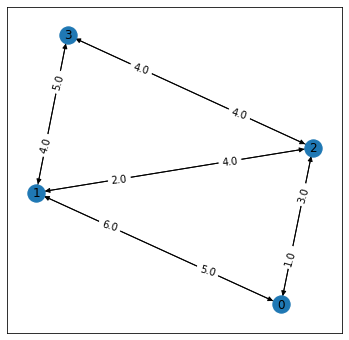

In [17]:
# From Params
seed = 11
n = 4
np.random.seed(seed)

# Set up quadratic relationship
D_scaling = np.random.randint(1, 7, size=(n,n))
D_func = lambda F: 1/2 * D_scaling * F ** 2
derivD_func = lambda F: D_scaling * F

G = Network(n=n, seed=seed, D_func=D_func, derivD_func=derivD_func, p=0.7)
G.setPhi(shortestPathsPhi(G))

G.visualize(withEdgeTraffic=True);
plt.gcf().set_size_inches(6, 6)

We next repeat all of the previous steps for the linear case

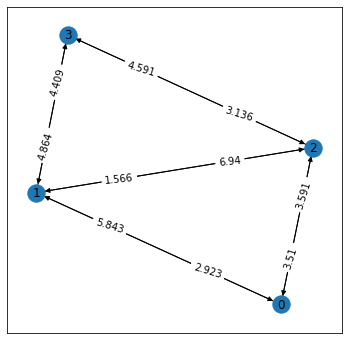

In [18]:
scores = iterGallagher(G, eta=eta)
assert(convergenceConditions(G))
gallagher_best = G.D_T()
G.visualize(withEdgeTraffic=True);
plt.gcf().set_size_inches(6, 6)

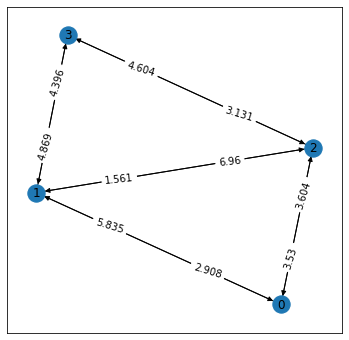

In [19]:
res, phi_best = optim(G) # Run the optimization routine
scipy_best = res.fun
G.setPhi(phi_best)
G.visualize(withEdgeTraffic=True);
plt.gcf().set_size_inches(6, 6)

In [20]:
#phi_best = integerRoutingPhi(G)
#with open('p_best_quad.pkl', 'wb') as f:
#    pickle.dump(phi_best, f)

In [21]:
with open('p_best_quad.pkl', 'rb') as f:
    G.setPhi(pickle.load(f))
    
integer_best = G.D_T()

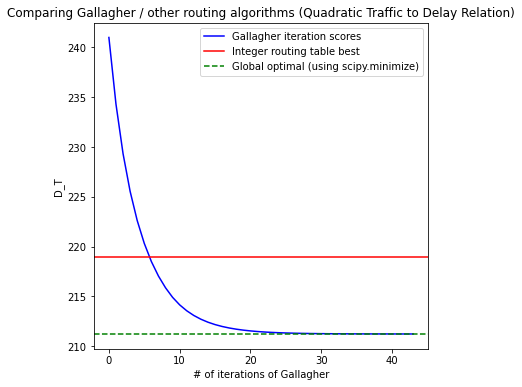

In [25]:
plt.plot(scores, 'b-', label='Gallagher iteration scores')
plt.axhline(y=integer_best, color='r', ls='-', label='Integer routing table best')
plt.axhline(y=scipy_best, color='g', ls='--', label='Global optimal (using scipy.minimize)')
plt.xlabel('# of iterations of Gallagher'); plt.ylabel('D_T');
plt.title('Comparing Gallagher / other routing algorithms (Quadratic Traffic to Delay Relation)')
plt.gcf().set_size_inches(6, 6)
plt.legend();

In [26]:
print('Gallagher score: ', gallagher_best)
print('Scipy score: ', scipy_best)
print('Integer score: ', integer_best)

Gallagher score:  211.22118887607826
Scipy score:  211.21899402495302
Integer score:  219.0
